Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [ ]:
NAME = "Munzir H. Abdulmajid"

---

ME 535 Winter 2021

# Homework 3

### Friday Feb. 12

1. In class, we discussed Gram_Schmidt orthogonalization and how it can be used as a method for QR factorization. In reponse to this question you will implement QR based on Gram-Schmidt, apply it to a test matrix and test the properties of the results.

1a) Write python code to implement the functions `unit()` (to normalize a vector) and `component_of_along_(a,b)` (to compute the component of vector $a$ in the direction of vector $b$). 

In [24]:
import numpy as np #import numpy as usual
import matplotlib.pyplot as plt #import plotting package
# also import specific functions to enable use without prefix to mae code a bit cleaner
from numpy.linalg import norm
from numpy.random import rand #use 'rand(m)' and 'rand(m,n)' to create 1D and 2D arrays of random floats on [0,1]
from numpy import dot, eye, zeros
# Note: altervative to 'np.dot(a,b)'
# 'matmul(a,b)' or its abbreviation 'a@b'
# preferred for matrix-matrix mult. and works for matrix-vector mult.

def unit(v):
    """
    Compute unit vector in u direction (normalize v)
    
    Args:
        u: 1D numpy array
    Returns:
        1D numpy array with unit length
    """
    # YOUR CODE HERE
    norm = np.linalg.norm(v)
    normal_array = v / norm
    return normal_array

In [25]:
from numpy.testing import assert_, assert_raises

v = np.array([3.,4.,12.])
uv = unit(v)
assert_(np.allclose(13*uv, v))

In [3]:
def componentof_along_(a,b):
    """
    Compute component of vector a along direction of vector b
    
    Args:
        a,b: 1D numpy arrays
    Returns:
        component: 1D numpy array
    """
    # YOUR CODE HERE
    nd = dot(a,b) / np.square(np.linalg.norm(b))
    component = nd*b
    return component

In [26]:
v_along_v = componentof_along_(v,v) #component of v in direction of v
assert_(np.allclose(v_along_v, v))   #should be the same as v
v_along_minus_v = componentof_along_(v,-v) #component of v in direction of -v
assert_(np.allclose(v_along_minus_v, v))    #should also be the same as v

b = np.array([6.,0.,0.])              #b lies along x0 direction
v_along_b = componentof_along_(v,b)  #component should agree with zeroing out all but index 0 entry in v
assert_(np.allclose(v_along_b, np.array([3.,0.,0.])))

b = np.array([2.,1.,0.])
v_along_b = componentof_along_(v,b)
assert_(np.allclose(v_along_b, np.array([4.,2.,0.])))


2a) Use the functions you wrote for problem 1 to implement `QR_GS(A)` that computes the $QR$ matrix factorization of matrix $A$ using Gram-Schmidt orthogonalization.

In [27]:
def QR_GS(mat):
    """
    Compute QR matrix factorization
    
    Args:
        mat: 2D numpy array representing a matrix
    Returns:
        Q: 2D numpy array representing 'orthogonal' matrix factor
        R: 2D numpy array representing rectangular matrix factor
    """
# YOUR CODE HERE
    m, n = mat.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = mat[:, j]

        for i in range(n - 1):
            q = Q[:, i]
            R[i, j] = q.dot(v)
            v = v - R[i, j] * q

        normal = norm(v)
        Q[:, j] = v / normal
        R[j, j] = normal
    return Q, R

In [20]:
# start with an example constructed by hand
# Construct a set of orthogonal unit vectors using Pythagorean triples
e0 = np.array([3.,4.,0.])/5.
e1 = np.array([4.,-3.,12.])/13.
e2 = np.cross(e0,e1) #The cross product of unit vectors is perp. to both and has unit length
Qtest = np.c_[e0,e1,e2] #column stack the orthonormal vectors
assert_(np.allclose(Qtest@Qtest.T, eye(3)))
Rtest = np.array([[1.,2.,3.],[0.,4.,5.],[0.,0.,6.]]) #construct upper triangular Rtest
Atest = Qtest@Rtest #construct test matrix

#apply QR_GSand check the outputs
Q,R = QR_GS(Atest)

#verify outputs agree with manufactured factors
assert_(np.allclose(Q, Qtest))      
assert_(np.allclose(R, Rtest))
assert_(np.allclose(Q@R, Atest))    #verify factorization
assert_(np.allclose(Q@Q.T, eye(3))) #verify orthonormal Q

#test with a small matrix of random numbers
n = 6 
A = rand(n,n)
Q, R = QR_GS(A)
print(R)
assert_(np.allclose(R, np.triu(R)))
assert_(np.allclose(Q@R, A))
assert_(np.allclose(Q.T@Q, eye(n)))


[[ 1.2163027   1.02399564  0.90160375  1.1312041   0.75297745  1.34637134]
 [ 0.          0.91811481  0.63443329  0.77755966  1.09472859  0.63293211]
 [ 0.          0.          0.58746787  0.23809886  0.39052124  0.18636711]
 [ 0.          0.          0.          0.67829089  0.65900393  0.39789674]
 [ 0.          0.          0.          0.          0.28146603 -0.16021888]
 [ 0.          0.          0.          0.          0.          0.04729158]]


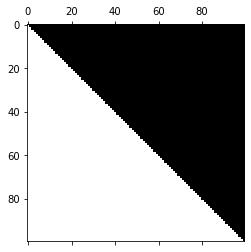

In [28]:
#test with a larger matrix of random numbers
n = 100
A = rand(n,n)
Q, R = QR_GS(A)
plt.spy(R) #creates a plot that darkens th indices with non-zero entries
assert_(np.allclose(R, np.triu(R)))
assert_(np.allclose(Q@R, A))
assert_(np.allclose(Q.T@Q, eye(n)))
assert_(norm(Q.T@Q - eye(n) == 0.)) # check that the norm of the residual is small

2b) Your implementation should be able to successfully pass the tests in part a, but now consider the example below:

In [29]:
#construct the test matrix A
n = 40
U,R = QR_GS(rand(n,n))
V,R = QR_GS(rand(n,n))
diag_vals = [0.5**j for j in range(n)]
S = np.diag(diag_vals)
A = U@S@V

#compute QR facctors based on Gram-Schmidt
Q,R = QR_GS(A)
print("Gram-Schmidt error measure: ", norm(Q.T@Q - eye(n)))

#compare with result of library function that uses Householder rotations instead of Gram-Schmidt
q,r = np.linalg.qr(A)
print("Householder error measure:   ", norm(q.T@q - eye(n)))

Gram-Schmidt error measure:  1.3638306719534811e-05
Householder error measure:    4.259594969720148e-15


Uncomment a line below corresponding to the statement that gives the best conclusion to draw from this evidence:

In [30]:
answer_a = "Computing QR factors is an ill-conditioned problem."
answer_b = "Using Gram-Schmidt orthogonalization to compute QR factors leads to a numerically unstable algorithm, but a stable algorithm can be created based on Householder rotations."
answer_c = "Householder rotations magically produce an accurate solution to an intractable problem."
#uncomment the line below corresponding to your answer
#answer = answer_a
answer = answer_b
#answer = answer_c
print(answer)

Using Gram-Schmidt orthogonalization to compute QR factors leads to a numerically unstable algorithm, but a stable algorithm can be created based on Householder rotations.


3. The Ch. 4 notebook provides an implementation of quadrature using composite Simpson's rule based on the following formula for contribution from a panel: $$Q = \frac{h}{3}(f_0 + 4 f_1 +f_2)$$
(That code is included below for convenience.) 

There is another quadrature formula, also due to Simpson, known as Simpson's 3/8 rule based on the formula:
$$Q = \frac{3h}{8}(f_0 + 3 f_1 + 3 f_2 + f_3)$$

Write python code to implement quadrature using composite Simpson's 3/8 rule.

In [31]:
#implement Simpson's rule
def simpson(f,a,b,n):
    """
    perform quadrature using Simpson's rule
    
    Args:
        fun: name of integrand function
        a, b: numerical integration limits (a<b)
        n: integer number of quadrature panels
    Returns:
        h: spacing between quadrature points
        quad: trapezoidal rule quadrature value    
    """
    h = (b-a)/(2*n)
    x = a + h
    quad = f(a) + 4*f(x) + f(b)
    sum = 3
    for i in range (1,n):
        x += h
        quad += 2*f(x)
        x += h
        quad += 4*f(x)
        sum += 2
    return h, (h/3)*quad

#implement Simpson's 3/8 rule
def simpson_38(f,a,b,n):
    """
    perform quadrature using Simpson's 3/8 rule
    
    Args:
        fun: name of integrand function
        a, b: numerical integration limits (a<b)
        n: integer number of quadrature panels
    Returns:
        h: spacing between quadrature points
        quad: trapezoidal rule quadrature value    
    """
    # YOUR CODE HERE
    h = (b-a)/(3*n)
    x = a
    quad = f(a) + 3*f(x+h) + 3*f(x+2*h) + f(b)
    for i in range (1,n):
        x += h
        quad += 3*f(x)
        x += h
        quad += 3*f(x)
        x += h
        quad += 2*f(x)
        
    quad = (3*h/8)*quad
    return h, quad

Compute the numerical quadrature estimate for the integral $I = \int_0^{\pi} sin(5x)dx$ using Simpson's rule and Simpson's 3/8 rule. Create a log-log plot showing how the error varies vs. stepsize/spacing for each method. 

  h          Error        Time


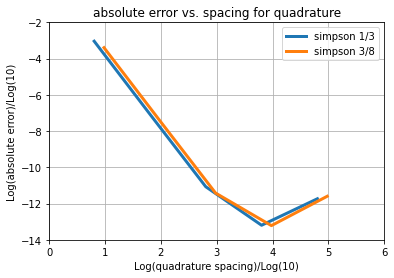

In [32]:
# Create log-log plot of error vs. stepsize for Simpson's rule and Simpson's 3/8 rule
# YOUR CODE HERE
from timeit import default_timer as timer

def f(x):
    return np.sin(5*x)
exact = 0.4
n = 5 #maximum exponent of h
a = 0.
b = np.pi
e_simp13 = np.zeros(n) #initialize array to store error values
h_vals13 = np.zeros(n) #initialize array to store spacing values
e_simp38 = np.zeros(n) #initialize array to store error values
h_vals38 = np.zeros(n) #initialize array to store spacing values
times = np.zeros(n) #initialize array to store computation times
print("  h          Error        Time")
for i in range(n):
    m = 10**(i+1)
    start = timer()
    h13, est13 =  simpson(f,a,b,m)
    h38, est38 =  simpson_38(f,a,b,m)
    end = timer()
    times[i] = (end - start) # Time in seconds
    error13 = np.abs(exact-est13)
    error38 = np.abs(exact-est38)
    e_simp13[i] = error13
    e_simp38[i] = error38
    h_vals13[i] = h13
    h_vals38[i] = h38
plt.plot(-np.log(h_vals13)/np.log(10), np.log(e_simp13)/np.log(10), linewidth=3,  label='simpson 1/3') 
plt.plot(-np.log(h_vals38)/np.log(10), np.log(e_simp38)/np.log(10), linewidth=3,  label='simpson 3/8')
ax = plt.gca() #you first need to get the axis handle
plt.axis([0,6,-14,-2])
plt.title("absolute error vs. spacing for quadrature")
plt.xlabel("Log(quadrature spacing)/Log(10)")
plt.ylabel("Log(absolute error)/Log(10)")
plt.grid(True)
plt.savefig("figure.png") #save the plot to a file
plt.legend()
plt.show()

Based on your plots, what is the order of the global truncation error for Simpson's rule? (To what power of $1/h$ is it proportional?)

In [33]:
answer1 = 1
answer2 = 2
answer3 = 3
answer4 = 4
answer5 = 5

#uncomment a line below to indicate your answer
#answer = answer1
#answer = answer2
#answer = answer3
answer = answer4
#answer = answer5
print(answer)

4


Based on your plots, what is the order of the global truncation error for Simpson's 3/8 rule? 

In [34]:
answer1 = 1
answer2 = 2
answer3 = 3
answer4 = 4
answer5 = 5

#uncomment a line below to indicate your answer
#answer = answer1
#answer = answer2
#answer = answer3
answer = answer4
#answer = answer5
print(answer)

4


Describe the tradeoff between these two quadrature methods? Which one would you choose to use and why?

YOUR ANSWER HERE: The two methods are similar with the difference lying in that the 3/8 method uses interpolant is a cubic polynomial. Each application of the 1/3 simpsons rule requires 3 points and 2 segments whereas the 3/8 rule requires 4 points and 3 segments. Since the accuracy improves as the number of segments increases I would choose 3/8 simpson's rule because it's more accurate (nearly twice as accurate).

5. The Ch. 7 notebook includes an implementation of an Runge-Kutta ODE solver `rk_solve()` that calls a function `rk2_step()` that computes a single step for the second order RK method. (Thos codes are included below for your convenience.)

Implement the `rk4_step()` function that computes a single step of the rth-order RK solver. 

In [35]:
def rk_solve(f,y0,t,order=4):
    """
    Runge-Kutta solver for systems of 1st order ODEs
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y0: numpy array of initial float values of dependent variable
        t: numpy array of float values of independent variable
        order: int order of RK solver with allowed values [1,2,4]
        
    Returns:
        y: 2D numpy array of float values of dependent variable
    """
    step_method = rk2_step # Temporary default value until rk4_step is implemented
    #####################
    # Specify the order #
    if 1 == order:
        step_method =  euler_step
    elif 2 == order:
        step_method = rk2_step
    elif 4 == order:
        step_method = rk4_step
    elif 4 != order:
        print("Requested order not in [1,2,4]. Using default order 4.")
    ######################
    # End of order spec. #
    # Start the solver   #
    ######################
    n = t.size
    m = y0.size #determine size of the dependent variable array
    y = [y0] #list to store 1D numpy array for each time
    for i in range(n-1):
        y_new = step_method(f,y[i],t[i],t[i+1]) #compute next step as before
        y.append(y_new)
        #NOTICE: For numpy array, would need loop to assign values into y one element at a time
        #for j in range(m): 
            #y[i+1,j] = y_new[j]
    return np.array(y)

def rk2_step(f,y,t0,t1):
    """
    compute next value for 2nd-order Runge-Kutta method ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y: float value of dependent variable
        t0: float initial value of independent variable
        t1: float final value of independent variable
        
    Returns:
        y_new: float estimated value of y(t1)
    """
    f0 = f(y,t0)
    h  = t1-t0
    
    #compute euler estimate for half step
    y1 = y + 0.5*h*f0
    t1 = t0 + 0.5*h
    
    #compute midstep rate estimate
    f1 = f(y1,t1)
    
    #take full step using midstep rate estimate 
    y_new = y + h*f1
    return y_new

def rk4_step(f,y,t0,t1):
    """
    compute next value for 4th-order Runge-Kutta method ODE solver
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y: float value of dependent variable
        t0: float initial value of independent variable
        t1: float final value of independent variable
        
    Returns:
        y_new: float estimated value of y(t1)
    """
    # YOUR CODE HERE
    h = t1 - t0
    f1 = f( y, t0 )
    f2 = f( y + 0.5 * h * f1, t0 + 0.5 * h )
    f3 = f( y + 0.5 * h * f2, t0 + 0.5 * h )
    f4 = f( y + h * f3, t0 + h )
    y_new = y + h* ( f1 + 2.0 * ( f2 + f3 ) + f4 ) / 6.0
    return y_new

Test your solver by running the code below that calls `rk4_step()` to solve the Lotka-Volterra equations 

$$\begin{aligned}
y_0' &= \alpha y_0 - \beta y_0 y_1 \\ 
y_1' &= -\gamma y_0 +\delta y_0 y_1
\end{aligned}$$

with initial conditions $y_0(0)=y_1(0)=10.0$ and plot the components of the numerical solution as functions of the independent time variable. (The labels are chosen to indicate the role of these equations as a model of population dynamics.)

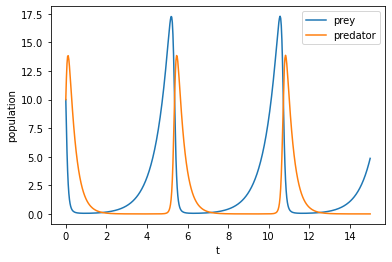

In [36]:
alpha = 1.5
beta = 1.0
gamma = 3.0
delta = 1.0
rhs = lambda y,t: np.array([alpha * y[0] - beta*y[0]*y[1], delta*y[0]*y[1] - gamma*y[1]])
steps = 500
y0 = np.array([10., 10.])
t = np.linspace(0,15,steps+1)
y = rk_solve(rhs, y0, t, 4)
exact = np.cos(t)
error = exact - y.T[0]
plt.plot(t, y.T[0], label="prey")
plt.plot(t, y.T[1], label="predator")
plt.xlabel("t")
plt.ylabel("population")
plt.legend()
plt.show()
